# Case Fatality Rate of countries due to Covid-19 pandemic

Confirmed and Death cases of a country are based on the dataset provided by JHU, Confirmed and Deaths. These countries are affected of SARS Covid-19 (aka Coronavirus) outbreak. The dataset consist of countries, wherein cases are indexed datewise.

This script fetches the online datasets and parses through them for the required countries and plot them in line-plots format.<br>
The plot is about cumulative fatality rate in different countries for past these days. The fatality rate is presented in percentage format.<br>
Fatality Rate = Death Cases/ Confirmed Cases

Datasets can be found here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series 
[Official github link]

Note: Country name being used in code is compulsorily same as in datasets' column *'Country/Region'*

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from matplotlib.dates import DateFormatter

### Import and Load Datasets
#### Confirmed Global
In link provided above one can see various datasets in form of comma separated files(csv), we will import Confirmed cases of Covid-19:
 *'time_series_covid19_confirmed_global.csv'*

In [2]:
Confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
Confirmed_cases.iloc[0:5,:] # Printing data explicitly

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,969,981,989,998,1004,1029,1050,1076,1099,1122
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,762,762,762,762,763,763,763,763,764,764
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,58,60,61,69,70,70,71,74,81,84


#### Death Global
In link provided above one can see various datasets in form of comma separated files(csv), we will import Confirmed cases of Covid-19:
 *'time_series_covid19_death_global.csv'*

In [3]:
Death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
Death_cases.iloc[0:5,:] # Printing data explicitly

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,193,205,216,218,219,220,227,235,246,249
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,32,32,33,33,33,33,33
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,575,582,592,600,609,617,623,630,638,646
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,4,4,4,4,4,4,4,4


### Setting Duration with Terminal Dates
The global datasets have their starting date from index = 4, and the date is 22nd January 2020

In [4]:
# Storing Start and End Date in string format of 'DD M YYYY' (Here M is whole month)

BeginDate = datetime.strptime(Confirmed_cases.columns[4],'%m/%d/%y').strftime("%d %B %Y")
EndDate = datetime.strptime(Confirmed_cases.columns[-1],'%m/%d/%y').strftime("%d %B %Y")
print(BeginDate)
print(EndDate)

22 January 2020
30 May 2020


### Function for Parsing Data

The dataset consist of some countries which are divided into their different Provinces, therefore our first step is to add up all such data.

#### FetchData Function

*Params*: Country Name 

*Returns*: Single row of (no. of)cases data of length equal to duration of terminal dates

The function takes care of the (no. of)cases data only and adds up all the rows corresponding to the particular country. There are countries with single row data as well, function takes care of them too.

In [5]:
# Function returns a row of cases(numerical data) related to the dataset passed as a parameter for a particular country

def FetchData(CountryName, Dataset):
    
    CountryRow = [0]*(Dataset.shape[1] - 4)
    
    for i in range(Dataset.shape[0]):
        if Dataset.iloc[i][1] == CountryName:
            for j in range(4,Dataset.shape[1]):
                CountryRow[j-4] += Dataset.iloc[i][j]
        
    return CountryRow

# --- Function Ends Here ---

#### CountryFR Function

*Params*: Country Name 

*Returns*: Single dataframe with Confirmed Cases, Death Cases and Fatality rate, indexed with dates

The function takes care of the (no. of)cases data, calculates Fatality Rate percentage and returns the dataframe for that particular country.

In [6]:
def CountryFR(CountryName):
       
    CountryFRdata = []
        
    CountryCCdata = FetchData(CountryName, Confirmed_cases)
    CountryDCdata = FetchData(CountryName, Death_cases)
        
    for i in range(len(CountryCCdata)):
        
        if CountryCCdata[i] > 0:
            FR = (CountryDCdata[i]/CountryCCdata[i])*100
            CountryFRdata.append(round(FR,2))
        else:
            CountryFRdata.append(0)
    
    Dateslist = pd.date_range(BeginDate, EndDate)
    df = pd.DataFrame(list(zip(CountryCCdata, CountryDCdata, CountryFRdata)), columns = ['Confirmed', 'Deaths', 'Fatality_Percent'], index = Dateslist)
    
    print(CountryName)
    print(df)
    
    return df

### Function to plot Fatality Rate data

*Params*: List of countries

*Returns*: None

Function plots the cumulative Fatality Rate (in percentage).<br> 
x-axis = Dates <br>
y-axis = Fatality Rate (in percentage) <br>
Graph also shows the last day value of the Fatality Rate (in percentage) with each country.

In [7]:
def PlotFRdata(loc):
    
    noc = len(loc)
    
    fig1, ax1 = plt.subplots(figsize = (20,18))
    
    palette = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'gray', 'magenta', 'lime', 'olive']
    pindex = 0
    
    for i in range(noc):
        
        CountryData = CountryFR(loc[i])
        
        # Plotting the lines and markers
        if pindex == 12:
            pindex = 0
        ax1.plot(CountryData.index, CountryData['Fatality_Percent'], color = palette[pindex], linestyle='-', linewidth = 1, 
             marker='o', markerfacecolor=palette[pindex], markersize=3)
                       
        ax1.plot(CountryData.index[-1], CountryData['Fatality_Percent'][-1], color=palette[pindex], 
             marker='o', markerfacecolor=palette[pindex], markersize = 6)
        
        Boxtext = str(loc[i] + ' :  ' + str(CountryData['Fatality_Percent'][-1]) + ' %')
        ax1.text(CountryData.index[-1] + pd.DateOffset(days=2), CountryData['Fatality_Percent'][-1], Boxtext, color='black', 
                 fontsize = 12, bbox=dict(facecolor='white', edgecolor=palette[pindex], boxstyle='round'))
        
        pindex = pindex+1
    
    ax1.grid(axis = 'y', alpha = 0.3)
    
    myFmt = DateFormatter("%d-%b")
    plt.gca().xaxis.set_major_formatter(myFmt)
    
    ax1.set_xlabel('Date', fontsize = 16)
    ax1.set_ylabel('Fatality Rate (in percent)', fontsize = 16)
    
    ax1.set_title('Covid-19 Fatality Rate in countries as of ' + EndDate, fontsize = 18)
    
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    plt.savefig('Countries_FatalityRate.png')
    
    # --- Function Ends Here ---
        

List of countries has been made to pass in the function for plotting. One can add more countries to it (or reduce).<br>

In [8]:
loc = ['India', 'Italy', 'China', 'Germany', 'Korea, South', 'US', 'United Kingdom', 'Canada', 'Russia']

### Finally the Plot

The plot is preceded by dataframe of the countries passed. Also check image of the plot, saved in your system.

India
            Confirmed  Deaths  Fatality_Percent
2020-01-22          0       0              0.00
2020-01-23          0       0              0.00
2020-01-24          0       0              0.00
2020-01-25          0       0              0.00
2020-01-26          0       0              0.00
...               ...     ...               ...
2020-05-26     150793    4344              2.88
2020-05-27     158086    4534              2.87
2020-05-28     165386    4711              2.85
2020-05-29     173491    4980              2.87
2020-05-30     181827    5185              2.85

[130 rows x 3 columns]
Italy
            Confirmed  Deaths  Fatality_Percent
2020-01-22          0       0              0.00
2020-01-23          0       0              0.00
2020-01-24          0       0              0.00
2020-01-25          0       0              0.00
2020-01-26          0       0              0.00
...               ...     ...               ...
2020-05-26     230555   32955             14.29
2020

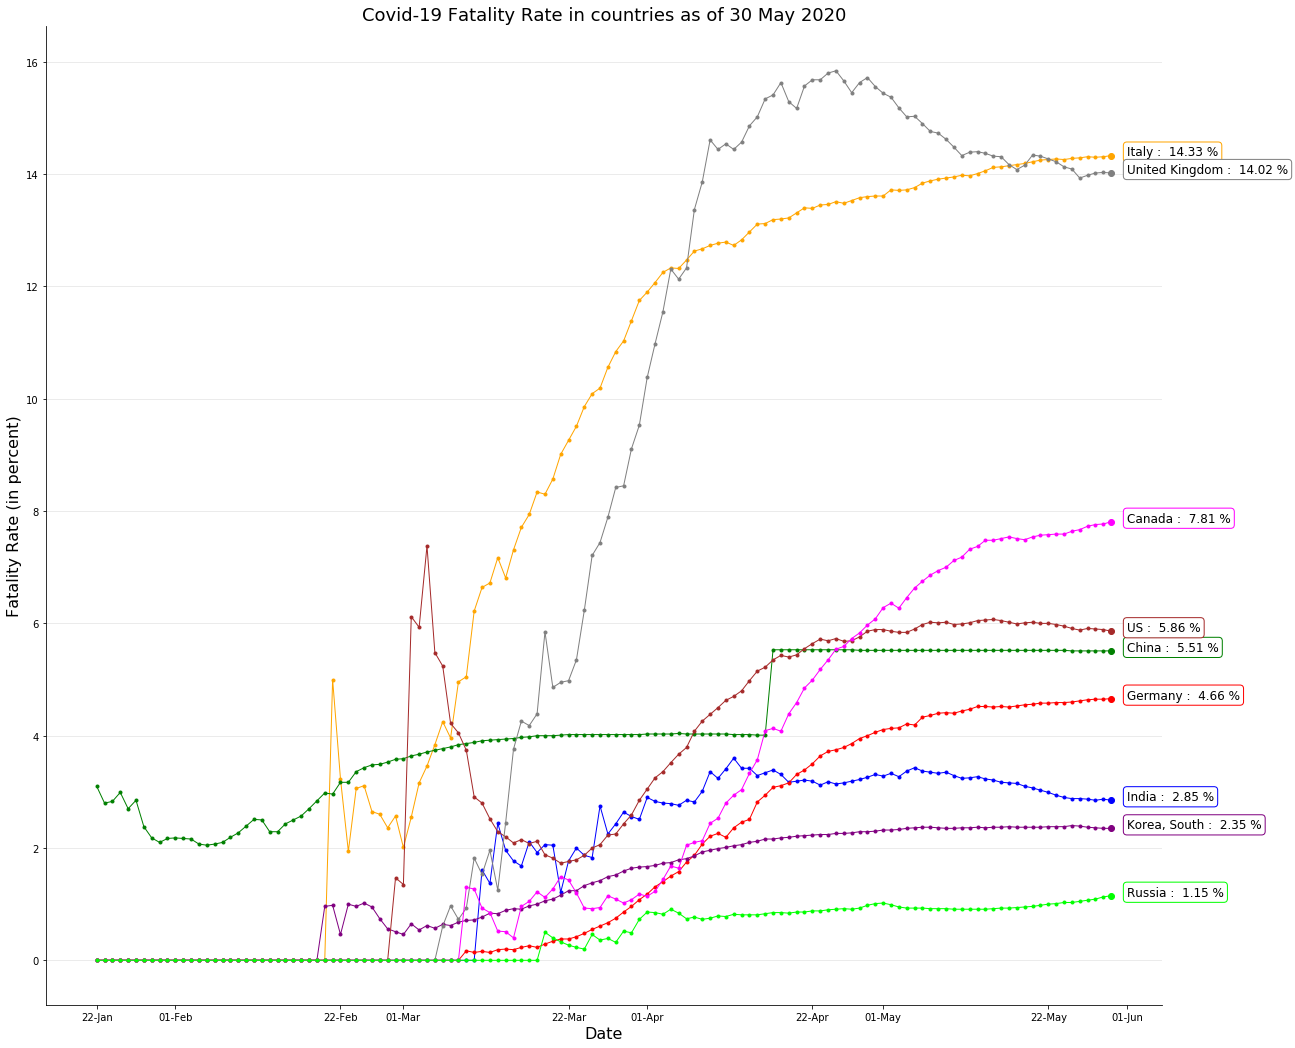

In [9]:
PlotFRdata(loc)